In [2]:
# Load Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd 

from sklearn.model_selection import train_test_split

# Variable Importance

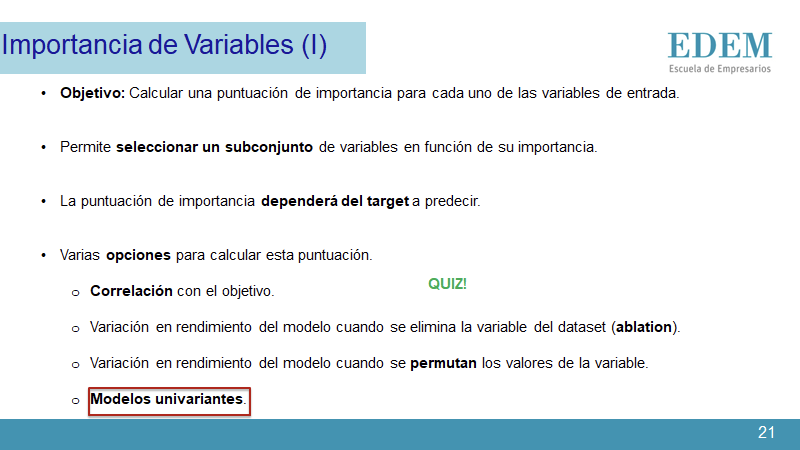

La importancia de las características se refiere a una clase de técnicas para asignar puntuaciones a las características de entrada de un modelo predictivo que indica la importancia relativa de cada característica a la hora de hacer una predicción.

Las puntuaciones de importancia de las características pueden calcularse para problemas que implican la predicción de un valor numérico, denominados regresión, y para problemas que implican la predicción de una etiqueta de clase, denominados clasificación.

Las puntuaciones son útiles y pueden utilizarse en una serie de situaciones en un problema de modelado predictivo, como:

    Entender mejor los datos.
    Comprender mejor un modelo.
    Reducir el número de características de entrada.
    


## Load Data

In [3]:
dat = pd.read_csv("../datasets/i2.csv", sep = ";")
dat.head()

,user,booking_date,origin_airport,price,sales channel,ant,airline
0,user5,01/11/2018,MAD,NaN,online,NaN,i2
1,user7,01/11/2018,DUB,147.500000,online,38.0,i2
2,user4,02/11/2018,TFS,24.049999,online,19.0,i2
3,user8,29/10/2018,MAD,59.709999,online,8.0,i2
4,user7,01/11/2018,NaN,37.299999,call center,4.0,i2


Utilicemos sólo variables numéricas como entrada (NAs llenas de 0s, ¡¡¡no recomendado!!!) y *sales channel* como objetivo.

In [3]:
X = dat[['price', 'ant']].fillna(0)
y = dat['sales channel']

Vamos a dividir los datos en entrenamiento y validación a efectos de este cuaderno.

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, test_size=0.3, random_state=1);


## Permutation Importance

La importancia de características por permutación es una técnica para calcular puntuaciones de importancia relativa que es independiente del modelo utilizado.

En primer lugar, se ajusta un modelo, lo más agnóstico y básico posible, al conjunto de datos. A continuación, se utiliza el modelo para hacer predicciones sobre un conjunto de datos, aunque se modifican los valores de una característica del conjunto de datos. Esto se repite para cada característica del conjunto de datos. Todo este proceso se repite 3, 5, 10 o más veces. El resultado es una puntuación de importancia media para cada característica de entrada.

In [12]:
from sklearn.inspection import permutation_importance
?permutation_importance

In [9]:
from sklearn.linear_model import LogisticRegression 

In [15]:
# 3) Define the model
model = model_constructor(random_state = 0)

# 4) Train the model
model.fit(X_train, y_train) 

# perform permutation importance
importance = permutation_importance(model, 
                                    X_val, 
                                    y_val, 
                                    random_state = 1)

# get importance
importance = pd.DataFrame({'variable' : X.columns.values, 'imp' : np.abs(importance.importances_mean)/np.max(np.abs(importance.importances_mean))}).sort_values(by = 'imp', ascending = False)
importance

,variable,imp
0,price,1.00
1,ant,0.75


Si queremos reducir nuestro conjunto de datos a una sola variable de entrada haremos esto.

In [ ]:
n_vars = 1
important_vars = importance.variable.values[0:n_vars].tolist()
important_vars

## Definir Función

In [19]:
def important_vars(X_train, y_train, model_constructor, 
                   X_val = None, y_val = None,  
                   method = 'generic', p = 0.5):
    if method == 'generic':
        
        # 3) Define the model
        model = model_constructor(random_state = 0)

        # 4) Train the model
        model.fit(X_train, y_train) 

        # Perform permutation importance
        importance = permutation_importance(model, X_val, y_val, random_state = 1) # In real life use validation!!!

        # Get importance
        importance = pd.DataFrame({'variable' : X.columns.values, 'imp' : np.abs(importance.importances_mean)/np.max(np.abs(importance.importances_mean))}).sort_values(by = 'imp', ascending = False)
        
    elif method == 'tree':
        # 3) Define the model
        model = DecisionTreeClassifier(random_state = 0)

        # 4) Train the model
        model.fit(X_train, y_train) 

        # Get importance
        importance = pd.DataFrame({'variable' : X.columns.values, 'imp' : model.feature_importances_/np.max(model.feature_importances_)}).sort_values(by = 'imp', ascending = False)
        
                
    # Get important vars
    important_vars = importance.variable.values[0:int(X.shape[1]*p)].tolist()
        
    # Select important vars
    X_train = X_train[important_vars]
    if not X_val is None:
        X_val = X_val[important_vars]
        
    #Return results
    return X_train, X_val

In [21]:
model_constructor

sklearn.linear_model._logistic.LogisticRegression

In [22]:
X_train_new, X_val_new = important_vars(X_train, y_train,                                        
                                       model_constructor = model_constructor,
                                       X_val = X_val, y_val = y_val,
                                       p = 0.5,  method = 'generic')
X_train_new

,price
289,0.000000
331,0.000000
180,115.230003
562,0.000000
569,0.000000
...,...
585,0.000000
722,24.309999
567,0.000000
866,122.529999


In [24]:
X_train_new, X_val_new = important_vars(X_train, y_train,
                                       model_constructor = None,
                                       X_val = X_val, y_val = y_val,
                                       p = 0.5,  method = 'tree')
X_train_new

,ant
289,19.0
331,44.0
180,47.0
562,64.0
569,6.0
...,...
585,18.0
722,59.0
567,5.0
866,2.0
